In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
veri = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
X = veri.drop(columns=['Class'])
y = veri['Class']

In [4]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
olcekleyici = StandardScaler()
X_egitim_olcekli = olcekleyici.fit_transform(X_egitim)
X_test_olcekli = olcekleyici.transform(X_test)

In [6]:
model = SVC(kernel='rbf', random_state=42)  # rbf çekirdeği kullandım, istersen 'linear' da olur
model.fit(X_egitim_olcekli, y_egitim)

SVC(random_state=42)

In [7]:
y_tahmin = model.predict(X_test_olcekli)

In [8]:
dogruluk = accuracy_score(y_test, y_tahmin)
print(f"Model Doğruluk Oranı: %{dogruluk * 100:.2f}")

Model Doğruluk Oranı: %93.39


In [9]:
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_tahmin))


Sınıflandırma Raporu:

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



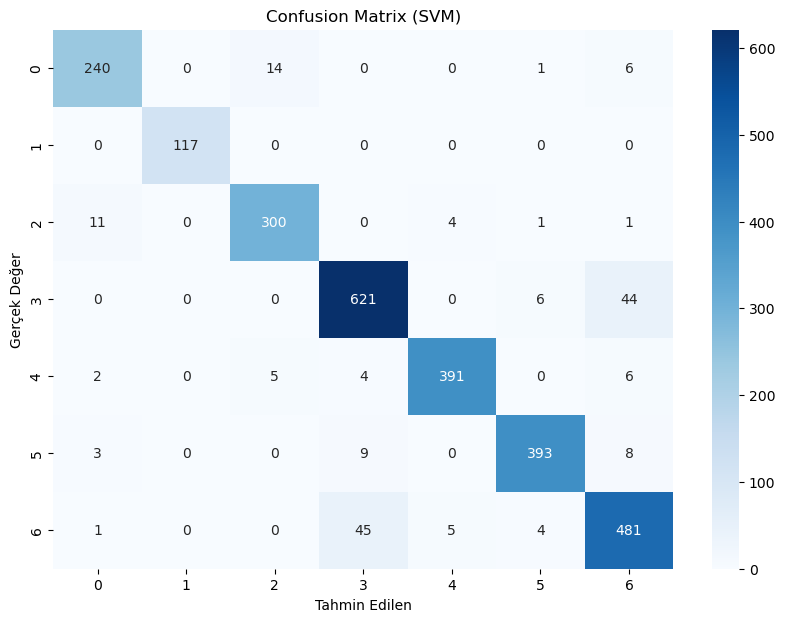

In [10]:
cm = confusion_matrix(y_test, y_tahmin)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [11]:
import numpy as np

In [12]:
ozellikler = X.columns.tolist()

In [13]:
rastgele_veri = np.random.rand(1, len(ozellikler))

In [14]:
rastgele_veri_olcekli = olcekleyici.transform(rastgele_veri)

C:\Users\Eren\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
tahmin = model.predict(rastgele_veri_olcekli)

print("Rastgele Oluşturulan Değerler:")
for ozellik, deger in zip(ozellikler, rastgele_veri.flatten()):
    print(f"{ozellik}: {deger:.3f}")

print("\nModelin Tahmini Sınıf:", tahmin[0])

Rastgele Oluşturulan Değerler:
Area: 0.593
Perimeter: 0.160
MajorAxisLength: 0.712
MinorAxisLength: 0.262
AspectRation: 0.597
Eccentricity: 0.706
ConvexArea: 1.000
EquivDiameter: 0.125
Extent: 0.236
Solidity: 0.165
roundness: 0.010
Compactness: 0.146
ShapeFactor1: 0.095
ShapeFactor2: 0.829
ShapeFactor3: 0.842
ShapeFactor4: 0.201

Modelin Tahmini Sınıf: HOROZ
